<h1>GaussianMixture</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.GaussianMixture.html#sklearn.mixture.GaussianMixture

<h4>概要</h4>
混合ガウスモデル（GMM:gaussin mixture model）は、パラメータがわからない複数のガウス分布を混ぜた（足した）ものからインスタンスが生成されていることを前提とする確率的なモデルである。一つのガウス分布から生成された全てのインスタンスは、一般に楕円体のような形になるクラスタを形成する。個々のクラスタは、異なる形、サイズ、密度、向きを持つことができる

<h4>GMMの構成</h4>
GMMのクラスは複数用意されている。最も単純なGaussianMixtureクラスの場合、ガウス分布の数kをあらかじめ指定しなければならない。データセットXは、次のような確率的プロセスによって生成されたものと仮定される<br>
・個々のインスタンスに対し、k個のクラスタから無作為に一つが選択される。j番目のクラスタが選ばれる確率は、クラスタの重み$\phi^{(j)}$によって定義される。i番目のインスタンスのために選ばれたクラスタのインデックスは、$z^{(i)}$と表記する<br>
・$z^{(i)}=j$なら、つまりi番目のインスタンスがj番目のクラスタに振り分けれているなら、このインスタンスの位置${x}^{(i)}$は、平均が$\mu^{(j)}$、共分散行列が$\Sigma^{(j)}$のガウス分布から無作為にサンプリングされる。これを$x^{(j)}\sim N(\mu^{(j)}, \Sigma^{(j)})$と記述する<br>
要するに、個々の変数$z^{(i)}$は、重みが$\phi^{(j)}$のカテゴリカル分布から抽出され、個々の変数${x}^{(i)}$は、平均、共分散行列がクラスタ$z^{(i)}$によって定義される正規分布から抽出される<br>
ここで${x}^{(i)}$は、その値がわかっているため、観測変数である。対して$z^{(i)}$は、その値がわからないため、潜在変数である

<h4>推定しなければならないパラメータ</h4>
アルゴリズムが推定しなければならないパラメータは以下の通りである<br>
重み$\phi^{(j)}$、平均$\mu^{(j)}$、共分散行列$\Sigma^{(j)}$ $(j=1,\dots,k)$<br>
ここで、$\mu$と$\Sigma$はベクトルで、その内包するパラメータ数はガウス分布の次元数による。重み$\phi^{(j)}$、平均$\mu^{(j)}$、共分散行列$\Sigma^{(j)}$は、それぞれ<b>weights_</b>属性、<b>means_</b>属性、<b>covariances_</b>属性でアクセスできる

<h4>EMアルゴリズム</h4>
sklearnのGaussianMixtureモデルは、EM（期待値最大化）アルゴリズムで、パラメータを推定する。EM法は、最初にクラスタのパラメータを無作為に選び、期待値ステップ（expectation step）と最大化ステップ（maximaization step）の2ステップの処理をパラメータが収束するまで繰り返す。期待値ステップは、各インスタンスが各クラスタに属する確率を現在のクラスタパラメータに基づき推計し、最大化ステップはデータセットに含まれる全てのインスタンスを使って、当該クラスタに属する確率によりインスタンスに重みをつけて、クラスタを更新する<br>
EM法は、kmeansと同様に、非最適解に収束することがあるため、何度か実行して最良解を残す必要がある。そのためには、<b>n_init</b>パラメータに実行回数を渡せば良い。デフォルトは1のため注意。EMアルゴリズムが収束したか、収束までに何イテレーションかかったかはそれぞれ、<b>converged_</b>属性、<b>n_iter_</b>属性でアクセスできる

<h4>GMMのメソッド</h4>
ハードクラスタリングでは<b>predict()</b>メソッド、ソフトクラスタリングでは<b>predict_proba()</b>メソッドを使う<br>
混合ガウスモデルは生成的なモデルであるため、<b>sample()</b>メソッドを使って、モデルから新しいインスタンスをサンプリングすることができる（インスタンスはクラスタインデックス順に並べられる）<br>
<b>score_sample()</b>メソッドで任意の位置におけるモデルの密度を推計することもできる。このメソッドは、与えられた各インスタンスについて、その位置の確率密度関数の対数を推計する。そのため、スコアをexponentialの指数として使えば、そのインスタンスの位置の確率密度の値が得られる<br>
<b>score()</b>メソッドは、引数に与えた各インスタンスの確率密度関数の合計の対数を返す。つまり、与えたデータの対数尤度を計算する

<h4>モデルに制約を加える</h4>
次元が多く、クラスタ数が多く、インスタンスが少ない、といった場合には、EMアルゴリズムは最適解に収束するのに苦労する。そこで、アルゴリズムが学習しなければならないパラメータの数を減らす、つまりモデルに制約をかけることを考える。そのためには、<b>covariance_type</b>パラメータを次の中のどれかにする<br>
・"spherical"→全てのクラスタが円形でなければならない。ただし、直径はまちまちで良い（つまり、分散は異なっていて良い）<br>
・"diag"→クラスタは楕円形であればどのような形でもいいし、サイズもまちまちで良い。しかし、楕円体の軸は座標軸と平行でなければならない。つまり、共分散行列は対角行列でなければならない<br>
・"tied"→全てのクラスタの楕円体の形、サイズ、向きが同じでなければならない。（つまり、全てのクラスタが同じ共分散行列を共有していなければならない）<br>
<b>covariance_type</b>のデフォルトは、クラスタごとに形、サイズ、向きがばらばらで良いという意味の"full"である（クラスタごとに独自の無制約な共分散行列がある）

<h4>GMMによる異常検知</h4>
混合ガウスモデルは異常検知にも使用できる。やり方はごく簡単で、密度の低い領域にあるインスタンスを異常値と見做せば良い。ただし、混合ガウスモデルは外れ値を含む全てのデータに適合しようとするので、異常値が多すぎると、モデルの「正常性」の解釈にバイアスがかかり、外れ値の一部が正常値と見なされてしまう。そのような場合は、とりあえずモデルを訓練してみた上で、もっとも極端な外れ値を検知、除去し、少しクリーンアップされたデータセットを改めて訓練すると良い<br>
※余談だが、異常検知と新規検知は異なる。新規検知はアルゴリズムが「クリーン」なデータセットで訓練されることが前提となっている点で異常検知と異なる。異常検知にはこのような前提条件はない

<h4>クラスタ数の決め方</h4>
K平均法と同様に、慣性やシルエットスコアを使うこともできるが、クラスタが円形でなかったり、サイズがまちまちであったりすると、これらの方法は信頼性がないため、混合ガウスモデルではベイズ情報量規準（BIC）や赤池情報量規準（AIC）といった理論的な情報量規準を最小化するモデルを見つける、という方針をとる<br>
$BIC=log(m)p-2log(\hat{L})$<br>
$AIC=2p-2log(\hat{L})$<br>
mはインスタンス数、pはモデルが学習するパラメータ数、$\hat{L}$はモデルの尤度関数<br>
BICとAICは、共に学習するパラメータが多い（例えば、クラスタ数が多い）モデルにペナルティを与え、データによく適合するモデルに報酬を与える。両者に差が出る場合、BICが選ぶモデルはAICが選ぶモデルよりも単純（パラメータが少ない）なものの、データへの適合度が低いものになる傾向がある（データセットが大きいときには特にこの特徴が顕著になる）<br>
BICとAICの計算には、<b>bic()</b>、<b>aic()</b>メソッドを呼び出す

<h4>混合ガウスモデルが苦手とする形</h4>
混合ガウスモデルは楕円形のクラスタではうまく機能するが、moonsデータセットのような、楕円形以外のデータセットにはうまく適合しない。これは後述するBayesianGaussianMixtureでも同様である

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs
from sklearn.datasets import make_moons

In [3]:
def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids, weights=None, circle_color='w', cross_color='k'):
    if weights is not None:
        centroids = centroids[weights > weights.max() / 10]
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='o', s=35, linewidths=8,
                color=circle_color, zorder=10, alpha=0.9)
    plt.scatter(centroids[:, 0], centroids[:, 1],
                marker='x', s=2, linewidths=12,
                color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X, resolution=1000, show_centroids=True,
                             show_xlabels=True, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),
                linewidths=1, colors='k')
    plot_data(X)
    if show_centroids:
        plot_centroids(clusterer.cluster_centers_)

    if show_xlabels:
        plt.xlabel("$x_1$", fontsize=14)
    else:
        plt.tick_params(labelbottom=False)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

In [4]:
X1, y1 = make_blobs(n_samples=1000, centers=((4, -4), (0, 0)), random_state=42)
print(X1.shape)
print(y1.shape, np.unique(y1))
# 楕円形にしている
X1 = X1.dot(np.array([[0.374, 0.95], [0.732, 0.598]]))
X2, y2 = make_blobs(n_samples=250, centers=1, random_state=42)
print(X2.shape, X2[0])
print(y2.shape, np.unique(y2))
X2 = X2 + [6, -8]
print(X2[0])
# np.r_に含まれる配列はaxis=0の方向に結合し、これはnp.hstack関数と同じ機能を持つ
X = np.r_[X1, X2]
y = np.r_[y1, y2]
print(X.shape)
print(y.shape, np.unique(y))

(1000, 2)
(1000,) [0 1]
(250, 2) [-1.10640331  7.61243507]
(250,) [0]
[ 4.89359669 -0.38756493]
(1250, 2)
(1250,) [0 1]


In [5]:
from sklearn.mixture import GaussianMixture

gm = GaussianMixture(n_components=3, n_init=10, random_state=42)
gm.fit(X)
print(gm.weights_)
print(gm.means_)
print(gm.covariances_)
print(gm.converged_)
print(gm.n_iter_)
print(gm.predict(X))
print(gm.predict_proba(X))

[0.39025715 0.40007391 0.20966893]
[[ 0.05131611  0.07521837]
 [-1.40763156  1.42708225]
 [ 3.39893794  1.05928897]]
[[[ 0.68799922  0.79606357]
  [ 0.79606357  1.21236106]]

 [[ 0.63479409  0.72970799]
  [ 0.72970799  1.1610351 ]]

 [[ 1.14833585 -0.03256179]
  [-0.03256179  0.95490931]]]
True
4
[0 0 1 ... 2 2 2]
[[9.76741808e-01 6.78581203e-07 2.32575136e-02]
 [9.82832955e-01 6.76173663e-04 1.64908714e-02]
 [7.46494398e-05 9.99923327e-01 2.02398402e-06]
 ...
 [4.26050456e-07 2.15512941e-26 9.99999574e-01]
 [5.04987704e-16 1.48083217e-41 1.00000000e+00]
 [2.24602826e-15 8.11457779e-41 1.00000000e+00]]


In [6]:
X_new, y_new = gm.sample(6)
print(X_new)
print(y_new)

[[-0.86944074 -0.32767626]
 [ 0.29836051  0.28297011]
 [-2.8014927  -0.09047309]
 [ 3.98203732  1.49951491]
 [ 3.81677148  0.53095244]
 [ 2.84104923 -0.73858639]]
[0 0 1 2 2 2]


In [7]:
print(gm.score_samples(X))
print(gm.score_samples(X).shape)

[-2.60768954 -3.57110232 -3.32987086 ... -3.51347241 -4.39798588
 -3.80746532]
(1250,)


In [8]:
# 確かに、score_samplesをexponentialの指数にとって、全データについて積分すると1となる
# 以下の操作は-10~10までを1/100ごとに分割し、2次元のデータポイントを全て表現するテクニック
resolution = 100
grid = np.arange(-10, 10, 1 / resolution)
xx, yy = np.meshgrid(grid, grid)
print(xx.shape, yy.shape)
print(xx)
print(yy)
X_full = np.vstack([xx.ravel(), yy.ravel()]).T
print(X_full.shape)
print(X_full)

# なぜ正規化するのに（合計を1にするのに）、(1 / resolution) ** 2をかければいいとわかっているのかがわからない
pdf = np.exp(gm.score_samples(X_full))
pdf_probas = pdf * (1 / resolution) ** 2
print(pdf_probas.sum())

(2000, 2000) (2000, 2000)
[[-10.    -9.99  -9.98 ...   9.97   9.98   9.99]
 [-10.    -9.99  -9.98 ...   9.97   9.98   9.99]
 [-10.    -9.99  -9.98 ...   9.97   9.98   9.99]
 ...
 [-10.    -9.99  -9.98 ...   9.97   9.98   9.99]
 [-10.    -9.99  -9.98 ...   9.97   9.98   9.99]
 [-10.    -9.99  -9.98 ...   9.97   9.98   9.99]]
[[-10.   -10.   -10.   ... -10.   -10.   -10.  ]
 [ -9.99  -9.99  -9.99 ...  -9.99  -9.99  -9.99]
 [ -9.98  -9.98  -9.98 ...  -9.98  -9.98  -9.98]
 ...
 [  9.97   9.97   9.97 ...   9.97   9.97   9.97]
 [  9.98   9.98   9.98 ...   9.98   9.98   9.98]
 [  9.99   9.99   9.99 ...   9.99   9.99   9.99]]
(4000000, 2)
[[-10.   -10.  ]
 [ -9.99 -10.  ]
 [ -9.98 -10.  ]
 ...
 [  9.97   9.99]
 [  9.98   9.99]
 [  9.99   9.99]]
0.9999999999215021


In [9]:
from matplotlib.colors import LogNorm

def plot_gaussian_mixture(clusterer, X, resolution=1000, show_ylabels=True):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),
                         np.linspace(mins[1], maxs[1], resolution))
    Z = -clusterer.score_samples(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z,
                 norm=LogNorm(vmin=1.0, vmax=30.0),
                 levels=np.logspace(0, 2, 12))
    plt.contour(xx, yy, Z,
                norm=LogNorm(vmin=1.0, vmax=30.0),
                levels=np.logspace(0, 2, 12),
                linewidths=1, colors='k')

    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,
                linewidths=2, colors='r', linestyles='dashed')
    
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)
    plot_centroids(clusterer.means_, clusterer.weights_)

    plt.xlabel("$x_1$", fontsize=14)
    if show_ylabels:
        plt.ylabel("$x_2$", fontsize=14, rotation=0)
    else:
        plt.tick_params(labelleft=False)

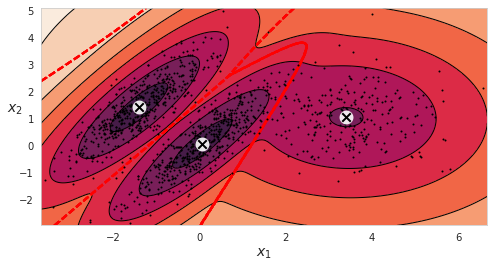

In [10]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.show()

In [11]:
# モデルに制約をかけて結果を比較してみる
gm_full = GaussianMixture(n_components=3, n_init=10, covariance_type="full", random_state=42)
gm_tied = GaussianMixture(n_components=3, n_init=10, covariance_type="tied", random_state=42)
gm_spherical = GaussianMixture(n_components=3, n_init=10, covariance_type="spherical", random_state=42)
gm_diag = GaussianMixture(n_components=3, n_init=10, covariance_type="diag", random_state=42)
gm_full.fit(X)
gm_tied.fit(X)
gm_spherical.fit(X)
gm_diag.fit(X)

GaussianMixture(covariance_type='diag', n_components=3, n_init=10,
                random_state=42)

In [12]:
def compare_gaussian_mixtures(gm1, gm2, X):
    plt.figure(figsize=(9, 4))

    plt.subplot(121)
    plot_gaussian_mixture(gm1, X)
    plt.title('covariance_type="{}"'.format(gm1.covariance_type), fontsize=14)

    plt.subplot(122)
    plot_gaussian_mixture(gm2, X, show_ylabels=False)
    plt.title('covariance_type="{}"'.format(gm2.covariance_type), fontsize=14)

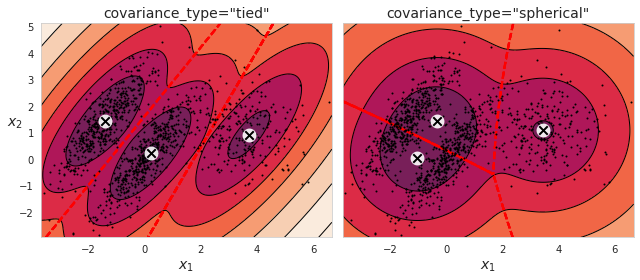

In [13]:
compare_gaussian_mixtures(gm_tied, gm_spherical, X)
plt.tight_layout()
plt.show()

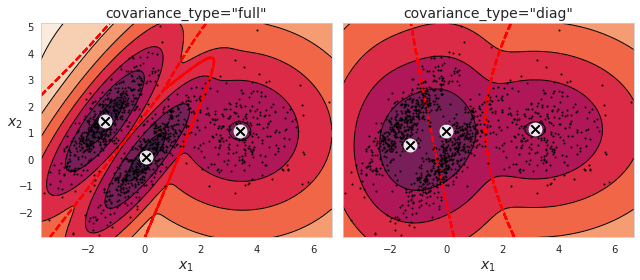

In [14]:
compare_gaussian_mixtures(gm_full, gm_diag, X)
plt.tight_layout()
plt.show()

<h3>GMMによる異常検知</h3>

In [15]:
# 確率密度スコアについて、下位4%の位置に閾値を設ける
densities = gm.score_samples(X)
density_threshold = np.percentile(densities, 4)
anomalies = X[densities < density_threshold]

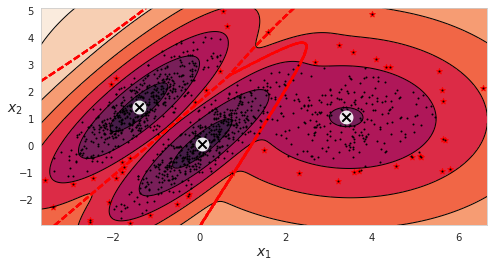

In [16]:
plt.figure(figsize=(8, 4))
plot_gaussian_mixture(gm, X)
plt.scatter(anomalies[:, 0], anomalies[:, 1], color='r', marker='*')
plt.ylim(top=5.1)
plt.show()

<h3>クラスタ数の決め方</h3>

In [17]:
print(gm.bic(X))
print(gm.aic(X))

8189.747000497186
8102.521720382148


In [18]:
# BICとAICを手計算してみる
n_clusters = 3
n_dims = 2
n_params_for_weights = n_clusters - 1
n_params_for_means = n_clusters * n_dims
n_params_for_covariance = n_clusters * n_dims * (n_dims + 1) // 2
n_params = n_params_for_weights + n_params_for_means + n_params_for_covariance
max_log_likelihood = gm.score(X) * len(X)
print(gm.score(X))
bic = np.log(len(X)) * n_params - 2 * max_log_likelihood
aic = 2 * n_params - 2 * max_log_likelihood
print(bic, aic)
print(n_params)

-3.227408688152859
8189.747000497186 8102.521720382148
17


In [19]:
# クラスタ数ごとにbic, aicを表示するグラフを描いて、bic, aicが最小となるクラスタ数を見つける
gms_per_k = [GaussianMixture(n_components=k, n_init=10, random_state=42).fit(X) for k in range(1, 11)]
bics = [model.bic(X) for model in gms_per_k]
aics = [model.aic(X) for model in gms_per_k]

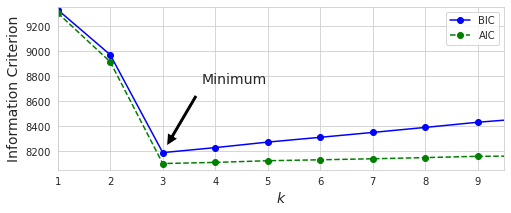

In [20]:
plt.figure(figsize=(8, 3))
plt.plot(range(1, 11), bics, "bo-", label="BIC")
plt.plot(range(1, 11), aics, "go--", label="AIC")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Information Criterion", fontsize=14)
plt.axis([1, 9.5, np.min(aics) - 50, np.max(aics) + 50])
plt.annotate('Minimum',
             xy=(3, bics[2]),
             xytext=(0.35, 0.6),
             textcoords='figure fraction',
             fontsize=14,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.legend()
plt.show()

In [21]:
# covariance_typeも含めて、最適なクラスタ数を見つける
min_bic = np.infty
for k in range(1, 11):
    for covariance_type in ("full","tied","spherical","diag"):
        bic = GaussianMixture(n_components=k, n_init=10, covariance_type=covariance_type, random_state=42).fit(X).bic(X)
        if bic < min_bic:
            min_bic = bic
            best_k = k
            best_covariance_type = covariance_type

print(best_k)
print(best_covariance_type)

3
full


<h1>BayesianGaussianMixture</h1>

https://scikit-learn.org/stable/modules/generated/sklearn.mixture.BayesianGaussianMixture.html#sklearn.mixture.BayesianGaussianMixture

<h4>BayesianGaussianMixtureの特徴</h4>
最適なクラスタ数は、手作業で探さなくても、BayesianGaussianMixtureで探せる。このクラスは、不要なクラスタの重さを０（またはそれに近い値）にすることができる。n_componentsに、最適なクラスタ数よりも明らかに大きい値を指定すると（そのため、問題について最低限の知識があることが前提になる）、アルゴリズムが自動的に不要なクラスタを捨ててくれる

<h4>クラスタ数についての事前の予測をモデルに織り込む</h4>
weight_consentration_priorハイパーパラメータを使うことで、クラスタ数についての事前の予測をモデルに織り込むことができる。具体的には、weight_consentration_priorの値を大きくすると、モデルは多数のクラスタを生成しやすくなり、weight_consentration_priorの値を大きくすると、クラスタ数は少なくなる。しかし、データの数が多ければ多いほど、この影響は小さくなる

In [22]:
# 確かに3つのクラスタにしか、有効な重みは付いていないように見える
from sklearn.mixture import BayesianGaussianMixture

bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X)
print(np.round(bgm.weights_, 2))

[0.4  0.21 0.4  0.   0.   0.   0.   0.   0.   0.  ]


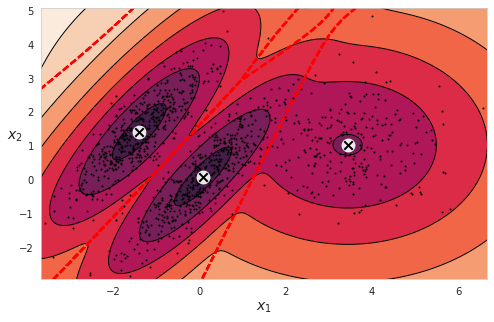

In [23]:
plt.figure(figsize=(8, 5))
plot_gaussian_mixture(bgm, X)
plt.show()

In [24]:
# weight_concentration_priorの値によって、クラスタ数がどのように変わるか
bgm_low = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=0.01)
bgm_high = BayesianGaussianMixture(n_components=10, max_iter=1000, n_init=1, weight_concentration_prior=10000)
# データ数が多いとweight_concentration_priorの効果が薄まるため、データ数を制限
nn = 73
bgm_low.fit(X[:nn])
bgm_high.fit(X[:nn])
print(np.round(bgm_low.weights_, 2))
print(np.round(bgm_high.weights_, 2))

[0.01 0.01 0.48 0.5  0.   0.   0.   0.   0.   0.  ]
[0.01 0.01 0.01 0.01 0.43 0.11 0.01 0.37 0.01 0.01]


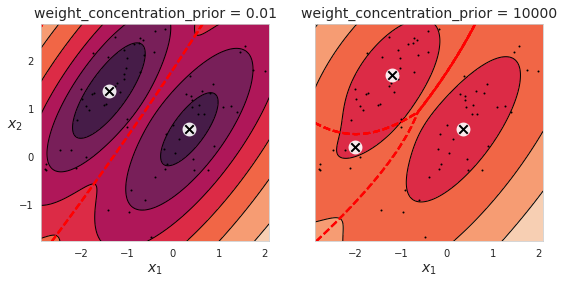

In [25]:
plt.figure(figsize=(9, 4))

plt.subplot(121)
plot_gaussian_mixture(bgm_low, X[:nn])
plt.title("weight_concentration_prior = 0.01", fontsize=14)

plt.subplot(122)
plot_gaussian_mixture(bgm_high, X[:nn], show_ylabels=False)
plt.title("weight_concentration_prior = 10000", fontsize=14)

plt.show()

In [26]:
# 楕円形以外のデータセットにはうまく適合しない
X_moons, y_moons = make_moons(n_samples=1000, noise=0.05, random_state=42)
bgm = BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)
bgm.fit(X_moons)

BayesianGaussianMixture(n_components=10, n_init=10, random_state=42)

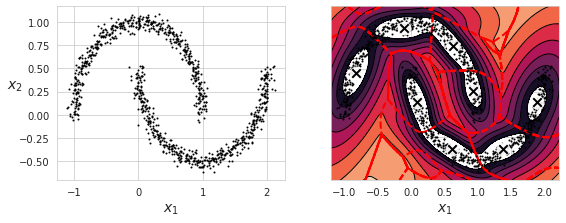

In [27]:
plt.figure(figsize=(9, 3.2))

plt.subplot(121)
plot_data(X_moons)
plt.xlabel("$x_1$", fontsize=14)
plt.ylabel("$x_2$", fontsize=14, rotation=0)

plt.subplot(122)
plot_gaussian_mixture(bgm, X_moons, show_ylabels=False)

plt.show()